In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('train_titanic.csv')
df1=pd.read_csv('test_titanic.csv')

In [ ]:
df.shape

(891, 12)

In [ ]:
df1.shape

(418, 11)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checking the missing values 

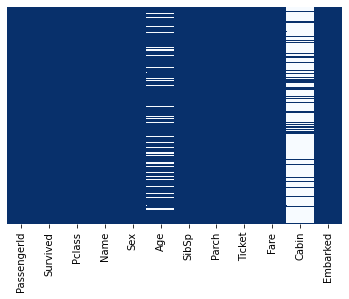

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues_r')

There are some missing values in age and cabin columns so we have to deal them or remove them

**For Cetagorical Variable**

In [ ]:
categorical_cols= df.select_dtypes(include=['object'])
print(f'The dataset contains {len(categorical_cols.columns.tolist())} categorical columns')
for cols in categorical_cols:
  print(cols,':', len(categorical_cols[cols].unique()),'labels')

The dataset contains 5 categorical columns
Name : 891 labels
Sex : 2 labels
Ticket : 681 labels
Cabin : 148 labels
Embarked : 4 labels


**Descriptive Analysis**

In [ ]:
import plotly.graph_objects as go

night_colors = ['#D3DBDD',  'navy',  '#57A7F3']
labels = [x for x in df[['Embarked']].value_counts().index]
values = df[['Embarked']].value_counts()

# Use `hole` to create a donut-like pie chart
fig=go.Figure(data=[go.Pie(labels=["Southampton","Cherbourg","Queenstown"],values=values,hole=.3,pull=[0,0,0.06,0])])

fig.update_layout(
    title_text="Port of embarkation")
fig.update_traces(marker=dict(colors=night_colors))
fig.show()

the majority of  the passengers are from southampton 

In [ ]:
night_colors = ['#D3DBDD',  'navy',  '#57A7F3']
labels = [x for x in df[['Sex']].value_counts().index]
values = df[['Sex']].value_counts()

# Use `hole` to create a donut-like pie chart
fig=go.Figure(data=[go.Pie(labels=["male",'female'],values=values,hole=.3,pull=[0,0,0.06,0])])

fig.update_layout(
    title_text="Gender")
fig.update_traces(marker=dict(colors=night_colors))
fig.show()

There was 68.4% passengeres are male that are signigficantly large then female

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Age')

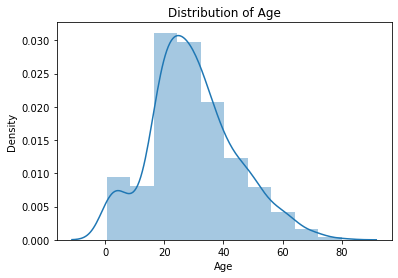

In [ ]:
sns.distplot(df['Age'],bins=10)
plt.title('Distribution of Age')

distribution of age is positvely skewed and also there are some missing values 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



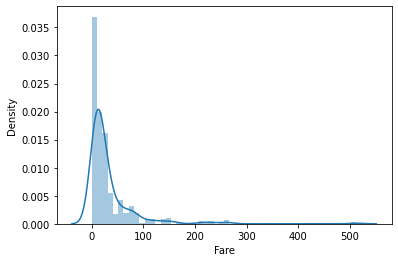

In [ ]:
sns.distplot(df['Fare'])

the fare distribution is also skewed so we also  need to take log of this if we want normalize it

In [ ]:
import plotly.figure_factory as ff
from plotly.offline import iplot
age=df['Fare'].dropna()
fig = ff.create_distplot([age],['Fare'],bin_size=1,)
fig.update_traces(marker=dict(color='#57A7F3'))
fig.update_layout(
    title="Age Distribution",
)
iplot(fig, filename='Basic Distplot')

In [ ]:
night_colors = ['#D3DBDD',  'navy',  '#57A7F3']
labels = [x for x in df[['Pclass']].value_counts().index]
values = df[['Pclass']].value_counts()

# Use `hole` to create a donut-like pie chart
fig=go.Figure(data=[go.Pie(labels=[3,2,1],values=values,hole=.3,pull=[0,0,0.06,0])])

fig.update_layout(
    title_text="Passengers class")
fig.update_traces(marker=dict(colors=night_colors))
fig.show()

Most of the passengers are brought  class 3  ticket then class 2 and class 1

In [ ]:
night_colors = ['#D3DBDD',  'navy',  '#57A7F3']
labels = [x for x in df[['Pclass']].value_counts().index]
values = df[['Pclass']].value_counts()

# Use `hole` to create a donut-like pie chart
fig=go.Figure(data=[go.Pie(labels=[3,2,1],values=values,hole=.3,pull=[0,0,0.06,0])])

fig.update_layout(
    title_text="Passengers class")
fig.update_traces(marker=dict(colors=night_colors))
fig.show()

In [ ]:
import plotly.offline as py
def PieChart(column, title, limit):
    male = df[df['Sex'] == 'male']
    female = df[df['Sex'] == 'female']
    count_male = male[column].value_counts()[:limit].reset_index()
    count_female = female[column].value_counts()[:limit].reset_index()
    color = ['#D3DBDD','navy','#57A7F3', 'lightgrey','orange', 'gold','lightgreen', 
                            '#D0F9B1','tomato', 'tan']
    
    trace1 = go.Pie(labels=count_male['index'], 
                    values=count_male[column], 
                    name= "male", 
                    hole= .4, 
                    domain= {'x': [0, .48]},
                   marker=dict(colors=color))

    trace2 = go.Pie(labels=count_female['index'], 
                    values=count_female[column], 
                    name="female", 
                    hole= .4,  
                    domain= {'x': [.52, 1]})
    layout = dict(title= title, font=dict(size=13), legend=dict(orientation="h"),
                  annotations = [
                      dict(
                          x=.21, y=.5,
                          text='Male', 
                          showarrow=False,
                          font=dict(size=16)
                      ),
                      dict(
                          x=.80, y=.5,
                          text='Female', 
                          showarrow=False,
                          font=dict(size=16)
                      )
        ])

    fig = dict(data=[trace1, trace2], layout=layout)
    py.iplot(fig)

In [ ]:
PieChart('Pclass', "Ticket class and gender", 3)

In [ ]:
PieChart('Embarked', "Embarkation and gender", 3)

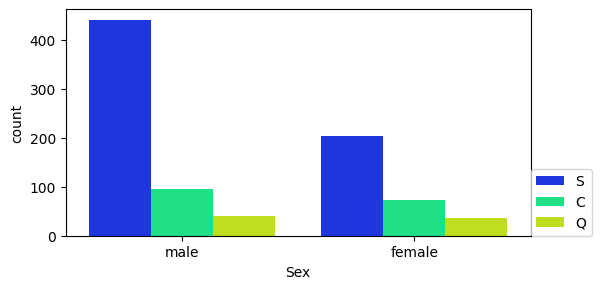

In [ ]:
for col in categorical_cols[['Sex']]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df,x=col,hue ='Embarked',palette='gist_rainbow_r')
    plt.legend(loc=(1,0))
    sns.set()

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Survived'].sum()

342

In [ ]:
df['Survived']= df['Survived'].astype('category')
df['Pclass']= df['Pclass'].astype('category')
df['SibSp']= df['SibSp'].astype('category')



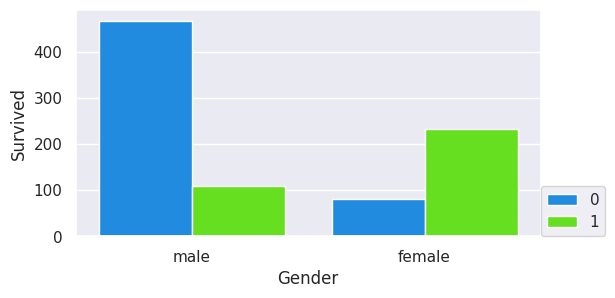

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3), dpi=100)
sns.countplot(data=df,x=col, hue=df['Survived'],palette='gist_rainbow_r')
plt.xlabel('Gender')
plt.ylabel('Survived')
plt.legend(loc=(1,0))
sns.set()

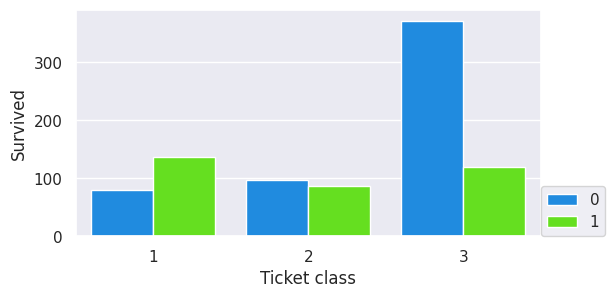

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3), dpi=100)
sns.countplot(data=df,x=df['Pclass'], hue=df['Survived'],palette='gist_rainbow_r')
plt.xlabel('Ticket class')
plt.ylabel('Survived')
plt.legend(loc=(1,0))
sns.set()

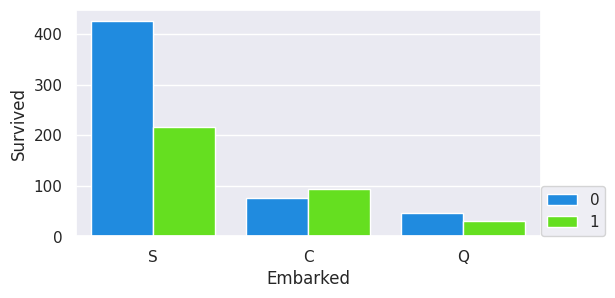

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3), dpi=100)
sns.countplot(data=df,x=df['Embarked'], hue=df['Survived'],palette='gist_rainbow_r')
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.legend(loc=(1,0))
sns.set()

Although there is a high percentage of survivers in who's port of embarkation is churbog the no of passengers in churbog is low compared to southampton and also this may happen due to the fact that many in churbog are class 1 passengers.

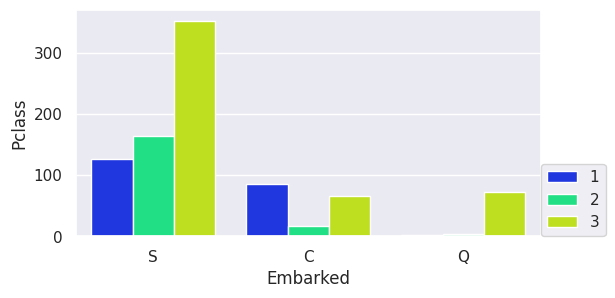

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3), dpi=100)
sns.countplot(data=df,x=df['Embarked'], hue=df['Pclass'],palette='gist_rainbow_r')
plt.xlabel('Embarked')
plt.ylabel('Pclass')
plt.legend(loc=(1,0))
sns.set()

This shows the above mentioned fact that churbog has higher number of class 1 passengers compared to other classes.

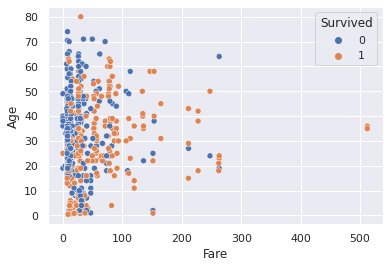

In [ ]:
sns.scatterplot(x=df['Fare'], y=df['Age'], hue=df['Survived'])

In [ ]:
import plotly.express as px
px.scatter(data_frame = df
           ,x = 'Fare'
           ,y = 'Age'
           ,color = 'Survived',
           size='Parch',
           hover_data=['Sex', 'Age'],
           color_discrete_sequence =['navy','#57A7F3','#D3DBDD'],
           title="Age vs Fare"
           )

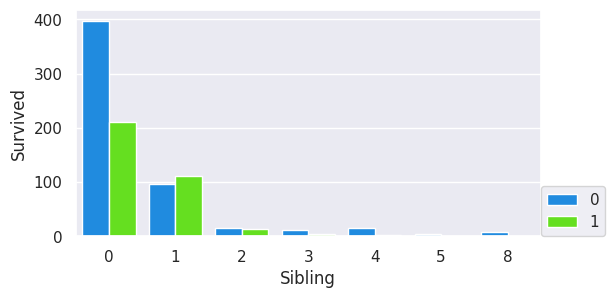

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3), dpi=100)
sns.countplot(data=df,x=df['SibSp'], hue=df['Survived'],palette='gist_rainbow_r')
plt.xlabel('Sibling')
plt.ylabel('Survived')
plt.legend(loc=(1,0))
sns.set()

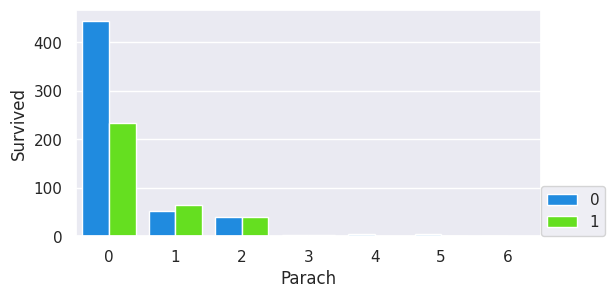

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3), dpi=100)
sns.countplot(data=df,x=df['Parch'], hue=df['Survived'],palette='gist_rainbow_r')
plt.xlabel('Parach')
plt.ylabel('Survived')
plt.legend(loc=(1,0))
sns.set()

These two graphs shows that higher percentage of passengers without relations on the ship have not survived while the chance of survival has been higher otherwise.

**Data Preprocessing**